In [1]:
import pandas as pd
import random
import numpy as np
import pickle
import keras
from keras.layers import *
from keras import backend as k
from keras import optimizers
from keras.models import Model
from time import time
from keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import manifold

Using TensorFlow backend.


In [4]:
uploaded = files.upload()

Saving encoder1.h5 to encoder1.h5
Saving encoder2.h5 to encoder2.h5


In [0]:
mfccs_test = np.load('test_mfccs.npy')
pitches_test = np.load('test_pitches (1).npy')
loudness_test = np.load('test_loudness.npy')
test_index = np.load('TestIndices.npy')

In [0]:
latent_features = np.load('latent_features.npy')
latent_features1 = np.load('latent_features1.npy')

In [5]:
encoder1 = load_model('encoder1.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
encoder2 = load_model('encoder2.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
def computeTSNEProjectionOfLatentSpace(X, encoder, display=True):
    # Compute latent space representation
    print("Computing latent space projection...")
    #X_encoded = encoder.predict(X, batch_size = 32)

    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X)

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        plt.figure(figsize = (10, 10))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label = 'Test latent vectors')
        plt.show()
    else:
        return X_tsne

Computing latent space projection...
Computing t-SNE embedding...
Plotting t-SNE visualization...


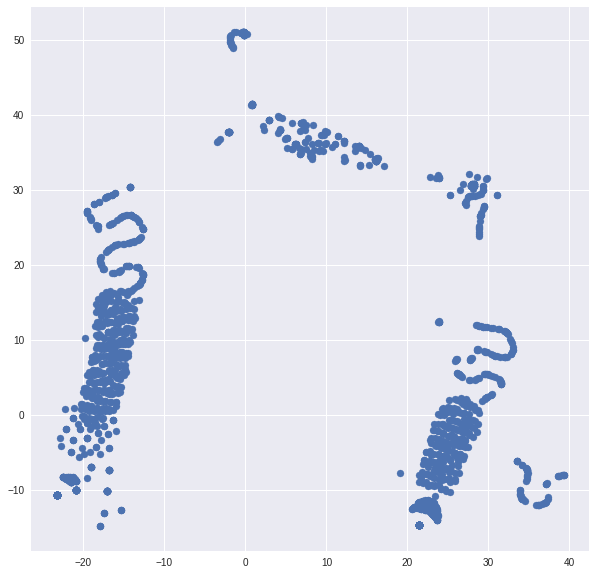

In [14]:
computeTSNEProjectionOfLatentSpace(latent_features, encoder1) #model with sigmoid activation

Computing latent space projection...
Computing t-SNE embedding...
Plotting t-SNE visualization...


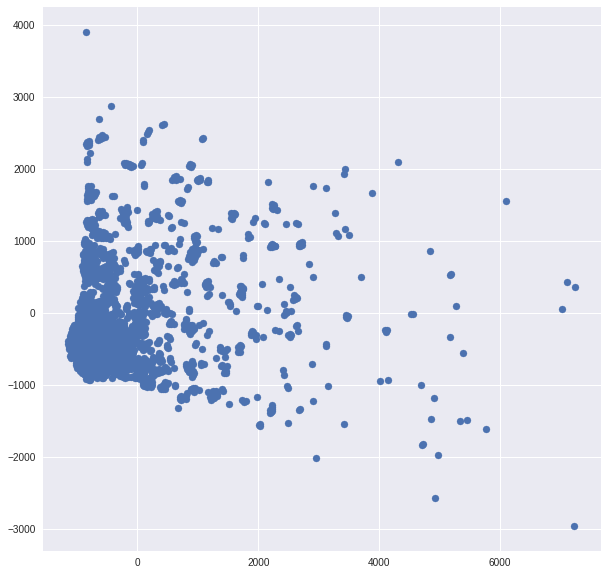

In [15]:
computeTSNEProjectionOfLatentSpace(latent_features1, encoder2) #model with linear activation

In [0]:
features = np.append(mfccs_test, pitches_test, axis = 2)
test_data = np.append(features, loudness_test, axis = 2)

In [0]:
test_pred = encoder.predict(test_data, batch_size = 32)

In [11]:
test_pred.shape

(2006, 20)

In [0]:
test_pred.dump('latent_features1.npy')

In [0]:
files.download('latent_features1.npy')